In [ ]:
%config IPCompleter.greedy=True  #Tab代码自动提示

### 引入依赖

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

## 调用GPU

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# 第二部分 计算机视觉介绍

## 2.2 加载Fashion MNIST数据集

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

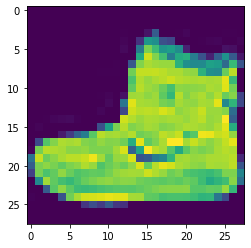

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

## 2.3 构造神经元网络模型

In [7]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(128, activation = tf.nn.relu))
model.add(keras.layers.Dense(10, activation = tf.nn.softmax))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 2.4 训练和评估模型

### 设置训练模型的配置
- optimizer 优化器 Adam
- loss 类别判断用的categorical_crossentropy，当标签是one-hot的时候，用categorical_crossentropy，当标签是整数的时候，用sparse
- metrics 训练时展示的参数 accuracy 参数

In [9]:
model.compile(
    optimizer = tf.optimizers.Adam(), 
    loss = tf.losses.sparse_categorical_crossentropy, 
    metrics = ['accuracy']
)

### 训练
- 将训练集的数据归一化，因为归一化有利于模型计算
- 然后用fit函数训练
- epochs是训练次数

In [10]:
train_images = train_images / 255.0
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4942 - accuracy: 0.8258
Epoch 2/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3745 - accuracy: 0.8643
Epoch 3/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3357 - accuracy: 0.8755
Epoch 4/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3103 - accuracy: 0.8862
Epoch 5/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2925 - accuracy: 0.8916
Epoch 6/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2772 - accuracy: 0.8979
Epoch 7/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2645 - accuracy: 0.8997
Epoch 8/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2539 - accuracy: 0.9050
Epoch 9/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2461 - accuracy: 0.9082
Epoch 10/10
60

结果：  loss是逐渐降低，accuracy逐渐增大

### 评估模型
- 之前训练时将训练集归一化，所以评估时也需要将测试集归一化

In [11]:
test_images_scaled = test_images / 255.0
model.evaluate(test_images_scaled, test_labels)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3461 - accuracy: 0.8802


[0.3460893443226814, 0.8802]

- 单个测试样例的展示

In [21]:
np.argmax(model.predict([[test_images_scaled[0]]]))

9

In [22]:
test_labels[0]

9

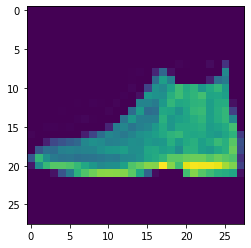

In [24]:
plt.imshow(test_images[0])

## 2.5 自动终止训练

为了防止训练次数过多导致的过拟合
- 回调函数


In [38]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('loss') < 0.4):
            print('\nLoss已经足够低了，所以停止训练!')
            self.model.stop_training = True

callbacks = myCallback()

- 构建模型，这次中间隐藏层设置成512个节点

In [39]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(512, activation = tf.nn.relu))
model.add(keras.layers.Dense(10, activation = tf.nn.softmax))

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


- 训练模型

In [41]:
model.compile(
    optimizer = tf.optimizers.Adam(), 
    loss = tf.losses.sparse_categorical_crossentropy, 
    metrics = ['accuracy']
)

model.fit(
    train_images, 
    train_labels, 
    epochs = 100, 
    callbacks = [callbacks]
)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 36us/sample - loss: 0.8724 - accuracy: 0.7084
Epoch 2/100
60000/60000 [==============================] - 2s 33us/sample - loss: 0.5446 - accuracy: 0.8059
Epoch 3/100
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4859 - accuracy: 0.8282
Epoch 4/100
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4544 - accuracy: 0.8401
Epoch 5/100
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4327 - accuracy: 0.8464
Epoch 6/100
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4182 - accuracy: 0.8528
Epoch 7/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4053 - accuracy: 0.8566
Epoch 8/100
58656/60000 [============================>.] - ETA: 0s - loss: 0.3950 - accuracy: 0.8588
Loss已经足够低了，所以停止训练!
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3945 - accuracy: 0.8594
